In [1]:
# 직접 코딩해보자

import sys, os
sys.path.append(os.pardir)
import numpy as np

# 실습의 common에 있는 function들을 가져와 쓴다 
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [2]:
# class 만들어보자
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)  # 표준 정규분포
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        print("y.shape", y.shape)  # W값 하나에 대해 loss는 두 번 불리게 된다. f(x+h)에 한번, f(x-h)에서 한번 (여기서 x는 W값이다)
        loss = cross_entropy_error(y, t)
        
        return loss
    
x = np.array([.6, .9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda k: net.loss(x, t)
"""
1) 초기 W값으로 예측을 해본다 predict
2) 예측값(=score)을 확률로 바꾼다. softmax 사용. 따라서 y.shape = (3,)
3) 마지막으로 loss 값을 계산해본다. 
"""
dW = numerical_gradient(f, net.W)

print(dW)

y.shape (3,)
y.shape (3,)
y.shape (3,)
y.shape (3,)
y.shape (3,)
y.shape (3,)
y.shape (3,)
y.shape (3,)
y.shape (3,)
y.shape (3,)
y.shape (3,)
y.shape (3,)
[[ 0.06228302  0.41052144 -0.47280446]
 [ 0.09342453  0.61578216 -0.70920669]]


1. 위에서는 6개의 W 기울기 값을 알아내기만 했다
2. 이제 이걸로 학습을 시켜야 한다


# 2층 신경망을 만들자

## 우선은 클래스부터 만들자

In [10]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # Weight의 초기화 작업
        self.params = {}  # 딕셔너리로 구현한다
        
        # Weight, bias 들의 크기는 input_size, hidden_size, output_size에 영향을 받는다
        # Weight에는 표준정규분포에 0.01을 곱해서 더 작은 값으로 만들기
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)  
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # 입력 데이터 x를 받아 값을 예측한 다음 정답과 비교하여 loss를 계산한다
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y,t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0] 
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num  # one_hot_label 이니 실제로 맞는 라벨의 예상 softmax 확률과의 차이만 dy에 나온다. 
        # 그런데 batch 전체 y들에 대한 것이므로 모든 batch 들에 대한 평균값이 나온다 
        
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

## 위 클래스를 기반으로 실제 미니배치 학습을 구현해보자


train acc, test acc | 0.0975166666667, 0.0974
train acc, test acc | 0.7799, 0.7869
train acc, test acc | 0.880033333333, 0.8814
train acc, test acc | 0.900433333333, 0.9037
train acc, test acc | 0.909683333333, 0.9127
train acc, test acc | 0.916216666667, 0.9198
train acc, test acc | 0.920566666667, 0.9237
train acc, test acc | 0.925133333333, 0.9282
train acc, test acc | 0.928983333333, 0.9302
train acc, test acc | 0.932283333333, 0.933
train acc, test acc | 0.935783333333, 0.9353
train acc, test acc | 0.93915, 0.9385
train acc, test acc | 0.940566666667, 0.941
train acc, test acc | 0.9428, 0.9415
train acc, test acc | 0.944916666667, 0.9445
train acc, test acc | 0.946683333333, 0.9457
train acc, test acc | 0.94865, 0.9476


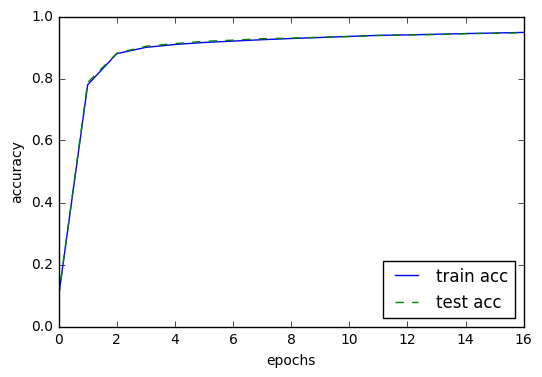

In [18]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []



# hyper parameter
iter_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)  # 784x50, 50 x10 의 W1, W2가 만들어지겠군

# 1 epoch당 반복수
iter_per_epoch = max(train_size / batch_size, 1)

# 드디어 실제 학습부분
for i in range(iter_num):
    # get mini batch
    
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # gradient calculate
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
